In [6]:
import pandas as pd
print ("pandas", pd.__version__)

import numpy as np
print ("numpy", np.__version__)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print ("seaborn", sns.__version__)


pandas 1.1.3
numpy 1.19.2
seaborn 0.11.0


In [7]:
Data= pd.read_excel("Data.xlsx")
Data

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,v_3,v_4,v_5,...,rts6898882,rts6904232,rts6904234,rts6904237,rts6904242,rts6904243,rts6905176,rts6905230,rts6905237,rts6912113
0,38,0,Kein Tester,Beendet (31),6898888,-77,610,mÃ¤nnlich,1957,Masterabschluss,...,0,245,0,525,605,346,0,0,584,610
1,39,0,Kein Tester,Beendet nach Unterbrechung (32),6898888,-77,-1,weiblich,1966,Allgemeine Hochschulreife / Abitur,...,0,33473,0,33601,33654,33525,33719,0,33635,33726
2,40,0,Kein Tester,Beendet (31),6898888,-77,311,mÃ¤nnlich,1990,Allgemeine Hochschulreife / Abitur,...,0,191,0,295,308,249,0,0,0,311
3,41,0,Kein Tester,Beendet (31),6898888,-77,177,weiblich,1996,Allgemeine Hochschulreife / Abitur,...,0,108,0,119,128,111,0,0,0,177
4,42,0,Kein Tester,Beendet (31),6898888,-77,442,mÃ¤nnlich,1996,Bachelorabschluss,...,0,175,0,350,402,227,416,0,384,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,184,0,Kein Tester,Beendet (31),6898888,-77,232,weiblich,1997,Fachhochschulreife,...,0,129,0,192,230,155,0,0,218,232
81,185,0,Kein Tester,Beendet (31),6898888,-77,570,mÃ¤nnlich,1995,Masterabschluss,...,0,371,0,503,567,441,0,0,545,570
82,186,0,Kein Tester,Beendet (31),6898888,-77,391,mÃ¤nnlich,1954,Allgemeine Hochschulreife / Abitur,...,0,211,0,335,387,275,0,0,368,391
83,187,0,Kein Tester,Beendet (31),6898888,-77,372,weiblich,1997,Allgemeine Hochschulreife / Abitur,...,0,197,0,302,349,255,0,0,332,372


In [ ]:
Data.describe


In [ ]:
Data.head

In [ ]:
Data.loc[1]

In [11]:
#Balken = Data.loc[:,["v_177", "v_178", "v_179", "v_180"]]
Balken = Data.loc[:,"v_177"]
Balken.value_counts()

-77                     28
stimme nicht zu         16
teils-teils             12
stimme zu               11
stimme eher nicht zu    10
stimme eher zu           8
Name: v_180, dtype: int64

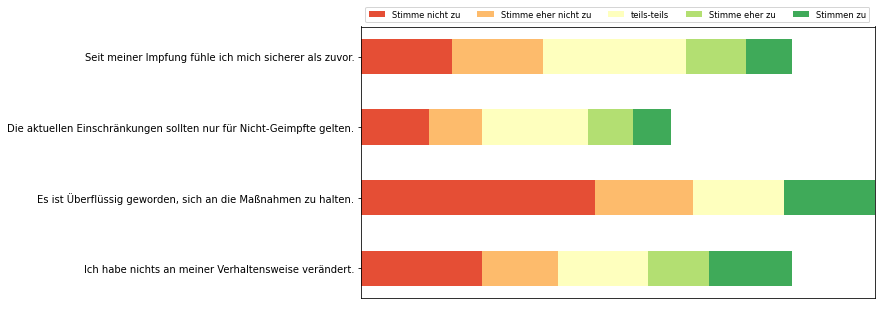

In [19]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py
category_names = ['Stimme nicht zu', 'Stimme eher nicht zu',
                  'teils-teils', 'Stimme eher zu', 'Stimmen zu']
results = {
    'Seit meiner Impfung fühle ich mich sicherer als zuvor.': [12, 12, 19, 8, 6],
    'Die aktuellen Einschränkungen sollten nur für Nicht-Geimpfte gelten.': [9, 7, 14, 6, 5],
    'Es ist Überflüssig geworden, sich an die Maßnahmen zu halten.': [31, 13, 12, 0, 12],
    'Ich habe nichts an meiner Verhaltensweise verändert.': [16, 10, 12, 8, 11]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [13]:
Balken = Data.loc[:,"v_3"]
Balken.value_counts()

weiblich        53
mÃ¤nnlich       30
divers           1
keine Angabe     1
Name: v_3, dtype: int64

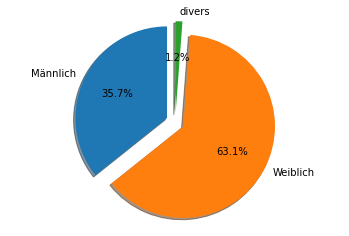

In [14]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Männlich', 'Weiblich', 'divers'
sizes = [30, 53, 1]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

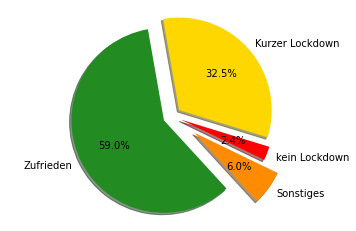

In [16]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Zufrieden', 'Sonstiges', 'kein Lockdown', 'Kurzer Lockdown'
sizes = [49, 5, 2, 27]
explode = (0.1, 0.3, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, colors=["forestgreen", "darkorange", "red", "gold" ])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
plt.savefig('Meinung.png')
plt.show()

In [17]:
Balken = Data.loc[:,"v_4"]
Balken.rename("Alter")
Balken.value_counts()
Balken

0     1957
1     1966
2     1990
3     1996
4     1996
      ... 
80    1997
81    1995
82    1954
83    1997
84    2000
Name: v_4, Length: 85, dtype: int64

<AxesSubplot:xlabel='v_4'>

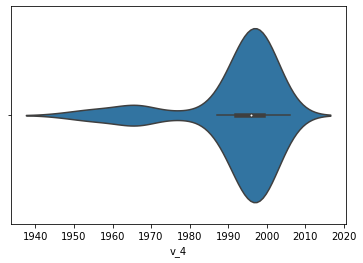

In [18]:
sns.violinplot(x=Balken )